# Lecture 4 - Geopandas
![](images/panda.jpeg)

## Geopandas uses the same strucutre but adds geometry
![](images/geodataframe.png)
- https://geopandas.org/getting_started/introduction.html

### What is geometry?
- Good question. 
  - The purpose of geopandas is to add geometry (spatial) data
  - But its also to add spatial operations, too. 
- First however we do need to know what geometry is:
  - Its a represenatation of a spatial location
    - It can only have one CRS (coordinate reference system)
  - It can come in several types, well beyond point, line, and polygon
    - We can actually mix points, lines, and polygons in the same geodataframe
      - I _really_ don't recommend this. It's like mixing array items, but worse
  - Spatial inforamtion is stored as spatially encoded objects (using a library called _shapely_ but we don't really need to know about it, it in turn is built on GDAL)
- Lets use an example we are familiar with and make it spatial

### Loading data
- Really easy to do with geopandas.
- Here is how you load a shapefile
  - Note here that we are actually loading a zip file!
    - This is simply awesome that we can do this, as it means we no longer have to mess about with .shp .shx .prj .dbf
    - You can actually store your entire dataset in a zip file with multiple folders and datasets. it is simply fantastic!


In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
nzpop = gpd.read_file('data/2023-census-population-change-by-ethnic-group-and-regional-c.shp')
lookup = pd.read_csv('data/2023_census_population_change_by_ethnic_group_and_rc_lookup_table.csv')

In [ ]:
print(nzpop)

In [ ]:
nzpop.crs

In [ ]:
lookup

In [ ]:
nzpop.plot()

<Axes: >

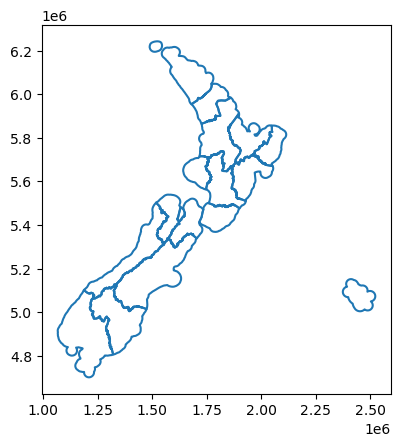

In [91]:
nzpop.boundary.plot()

<Axes: >

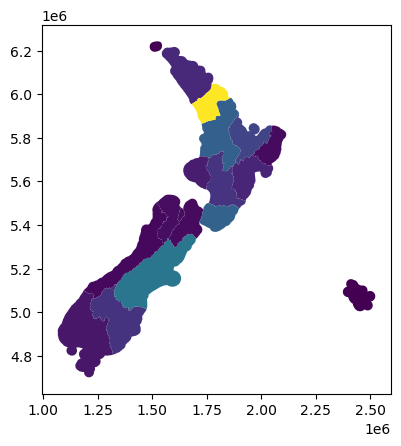

In [90]:
nzpop.plot(column="VAR_1_23")

In [ ]:
nzpop.plot(column='VAR_1_23', legend=True,
           legend_kwds={'label': "Population in 2023",
                        'orientation': "vertical"},
           cmap='OrRd')
plt.title('Choropleth Map of Population in 2023')
plt.show()

In [ ]:
import mapclassify as mc

In [ ]:
# Classify using Natural Breaks (Jenks)
classifier = mc.NaturalBreaks(y=nzpop["VAR_1_23"], k=5)  # k is the number of classes

# Plot the choropleth map
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
nzpop.plot(column="VAR_1_23", cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', 
           scheme='NaturalBreaks', classification_kwds={'k': 5}, legend=True)

# Add a title
plt.title('Choropleth Map of Population with Natural Breaks')

# Show the plot
plt.show()


In [ ]:
nzpop.plot(kind="scatter", x="VAR_1_15", y="VAR_1_23")

In [ ]:
temp_df = nzpop.copy()
temp_df['VAR_1_15_div'] = temp_df['VAR_1_15'] / 1000
temp_df['VAR_1_23_div'] = temp_df['VAR_1_23'] / 1000

In [ ]:
temp_df

In [ ]:
# Plot using the temporary DataFrame
temp_df.plot(kind="scatter", x="VAR_1_23_div", y="VAR_1_15_div")

# Optionally add labels and title
ax = plt.gca() # get current axis
ax.set_xlabel('Total Pop 2023 (in thousands)')
ax.set_ylabel('Total Pop 2018 (in thousands)')
ax.set_title('Census 2018 vs Census 2023')
plt.show()

In [ ]:
nzpop[["VAR_1_15", "VAR_1_23", "geometry"]].plot.hist(alpha=.4)

In [ ]:
# Select the columns you want to plot
selected_columns = nzpop[["VAR_1_15", "VAR_1_23"]]

# Create a histogram for each selected column
selected_columns.plot.hist(alpha=0.4, subplots=True, layout=(1, 2), figsize=(12, 6), bins=30)

# Optionally adjust spacing
plt.tight_layout()
plt.show()

In [ ]:
# Create a figure with 1 row and 3 columns for subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot the first variable
nzpop.plot(column='VAR_1_15', ax=ax1, legend=True, cmap='OrRd')
ax1.set_title('Population 2018')
cbar1 = ax1.get_figure().get_axes()[2]  # Get the first colorbar axis
cbar1.ticklabel_format(style='plain') # Access the colorbars (legends) and apply ticklabel_format

# Plot the second variable
nzpop.plot(column='VAR_1_23', ax=ax2, legend=True, cmap='YlGn')
ax2.set_title('Population 2023')
cbar2 = ax2.get_figure().get_axes()[3]  # Get the second colorbar axis
cbar2.ticklabel_format(style='plain')

# Adjust layout to prevent overlap
plt.tight_layout()
# Show the plot
plt.show()

In [ ]:
import geodatasets

In [ ]:
chicago = gpd.read_file(geodatasets.get_path("geoda.chicago_commpop"))
groceries = gpd.read_file(geodatasets.get_path("geoda.groceries"))

In [ ]:
chicago

In [ ]:
chicago_shapes = chicago[['geometry', 'NID']]
chicago_names = chicago[['community', 'NID']]

In [ ]:
chicago_shapes = chicago_shapes.merge(chicago_names, on='NID')

In [ ]:
chicago.head()
groceries.head()

In [ ]:
groceries_with_community = groceries.sjoin(chicago, how="inner", predicate='intersects')

In [ ]:
groceries_with_community.head()

The default spatial index in GeoPandas currently supports the following values for predicate which are defined in the Shapely documentation:

* intersects
* contains
* within
* touches
* crosses
* overlaps